In [4]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [43]:
df = pd.read_csv('train10K.csv')

train_set, test_set = train_test_split(df, test_size=0.15, random_state=42)

y_train = train_set[["approved"]].copy()
X_train = train_set.drop(["approved","amount","label"],axis=1)
X_train = X_train.values.astype(np.float32)
y_train = y_train.values.reshape(-1)

y_test = test_set[["approved"]].copy()
y_test = y_test.values.reshape(-1)
X_test = test_set.drop(["approved","amount","label"],axis=1)
X_test = X_test.values.astype(np.float32)

X_valid, X_train = X_train[:1000], X_train[1000:]
y_valid, y_train = y_train[:1000], y_train[1000:]

In [44]:
def clf_model():
    model = Sequential()
    model.add(Dense(100, input_dim=8, kernel_initializer='normal',activation='relu'))
    model.add(Dense(50,kernel_initializer='normal',activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [30]:
seed = 7
np.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, epochs=50,batch_size=50,verbose=0)

In [31]:
kfold = KFold(n_splits=5, random_state=seed)
result = cross_val_score(estimator,X_train,y_train,cv=kfold)
scores = np.sqrt(-result)

In [32]:
def score_show(scores):
    print("Score: ",scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [33]:
score_show(scores)

Score:  [4448.92089912 4257.09305356 4312.49602898 4295.12955179 4322.66458719]
Mean:  4327.260824129439
Standard Deviation:  64.80159428028837


In [52]:
model = clf_model()
history = model.fit(X_train, y_train, epochs=50,batch_size=50,validation_split=0.2)

Train on 6000 samples, validate on 1500 samples
Epoch 1/50
6000/6000 [==============================] - 2s 267us/step - loss: 0.4423 - acc: 0.7902 - val_loss: 0.2977 - val_acc: 0.8720
Epoch 2/50
6000/6000 [==============================] - 0s 51us/step - loss: 0.2819 - acc: 0.8673 - val_loss: 0.2511 - val_acc: 0.8813
Epoch 3/50
6000/6000 [==============================] - 0s 55us/step - loss: 0.2372 - acc: 0.8900 - val_loss: 0.2048 - val_acc: 0.9100
Epoch 4/50
6000/6000 [==============================] - 0s 46us/step - loss: 0.2101 - acc: 0.9035 - val_loss: 0.1824 - val_acc: 0.9207
Epoch 5/50
6000/6000 [==============================] - 0s 47us/step - loss: 0.1798 - acc: 0.9193 - val_loss: 0.1749 - val_acc: 0.9147
Epoch 6/50
6000/6000 [==============================] - 0s 50us/step - loss: 0.1525 - acc: 0.9357 - val_loss: 0.1359 - val_acc: 0.9420
Epoch 7/50
6000/6000 [==============================] - 0s 46us/step - loss: 0.1291 - acc: 0.9498 - val_loss: 0.2034 - val_acc: 0.9033
Epoch 

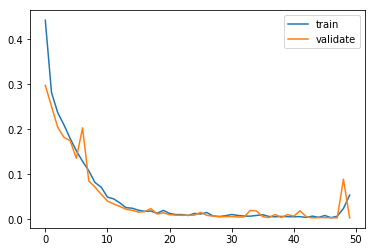

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validate')
plt.legend()
plt.show()

In [48]:
print(model.predict(X_valid[:10]).tolist())

[[1.0], [0.0], [0.9998846054077148], [0.0], [1.0], [0.0], [0.0], [1.0], [1.5843278705218934e-28], [1.3127114846522847e-11]]


In [49]:
print(y_valid[:10])

[1 0 1 0 1 0 0 1 0 0]
